# calories deduction (regression)

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
# loading the data from csv file to a Pandas DataFrame, link: https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos
calories_data = pd.read_csv('/content/calories.csv')
exercise_data = pd.read_csv('/content/exercise.csv')
calories_data.head()


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
# concatenating the two csv, axis=1 to choose the column
concat_data = pd.concat([exercise_data, calories_data['Calories']], axis=1)
concat_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
concat_data.shape


(15000, 9)

In [ ]:
calories_data.describe()

,User_ID,Calories
count,1.500000e+04,15000.000000
mean,1.497736e+07,89.539533
std,2.872851e+06,62.456978
min,1.000116e+07,1.000000
25%,1.247419e+07,35.000000
50%,1.499728e+07,79.000000
75%,1.744928e+07,138.000000
max,1.999965e+07,314.000000


# visuals

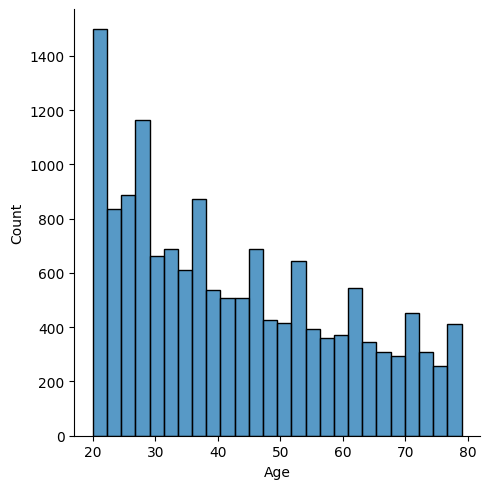

In [ ]:
# plotting the distribution of "Age" column
sns.displot(concat_data['Age'])

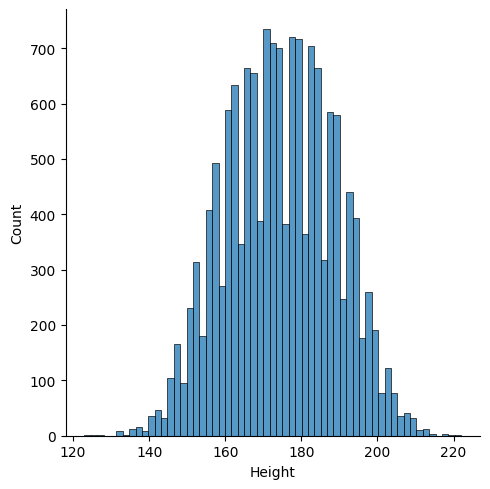

In [ ]:
# plotting the distribution of "Height" column
sns.displot(concat_data['Height'])

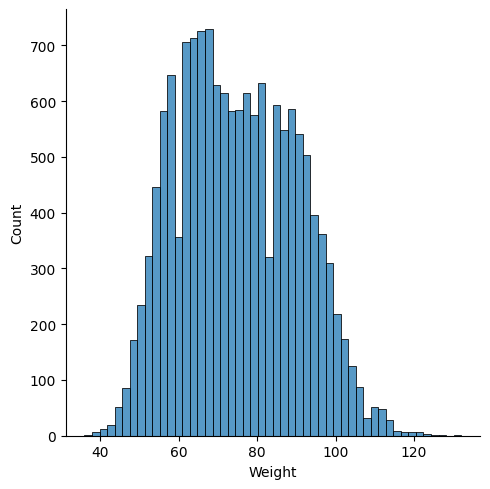

In [ ]:
# plotting the distribution of "Weight" column
sns.displot(concat_data['Weight'])

# correlation

In [ ]:
correlation = concat_data.corr()

<ipython-input-15-b7562d797b9a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = concat_data.corr()


<Axes: >

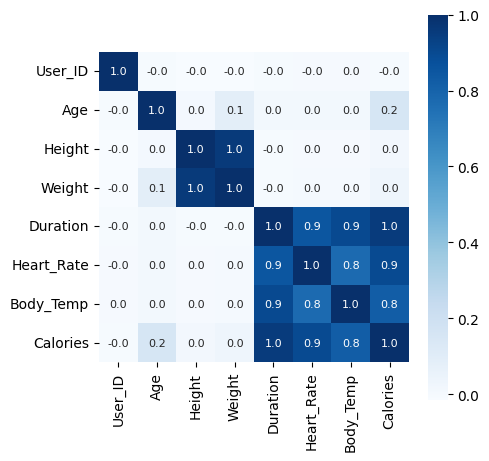

In [ ]:
# constructing a correlation heatmap

plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# normalization
concat_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [ ]:
# seperating features and labels
X = concat_data.drop(columns=['User_ID','Calories'], axis=1)
Y = concat_data['Calories']

In [ ]:
# splitting data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [ ]:
# loading the regression model
model = XGBRegressor()

# fitting with training
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[197.55533   71.09331  196.11734  ...  27.588661 107.2924    14.824119]


In [ ]:
# mean absolute error
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("mean absolute error = ", mae)

mean absolute error =  1.5238624797264735
